<a href="https://colab.research.google.com/github/laussin86/-Airbnb-Market-Analysis-Real-Estate-Sales-Data/blob/main/%F0%9F%8F%A0_Airbnb_Market_Analysis_%26_Real_Estate_Sales_Data(occupancy_predicition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the geolocation dataset
geolocation_path = '/content/drive/MyDrive/BCG/AirBnb/geolocation.csv'
geolocation_data = pd.read_csv(geolocation_path,delimiter=";")
amenities_data = pd.read_csv('/content/drive/MyDrive/BCG/AirBnb/amenities.csv')
market_analysis_path = '/content/drive/MyDrive/BCG/AirBnb/market_analysis.csv'
# Initial assessment of the geolocation dataset

geolocation_data.info()
geolocation_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49311 entries, 0 to 49310
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   unified_id   49311 non-null  object
 1   month        49311 non-null  object
 2   street_name  11589 non-null  object
 3   latitude     49311 non-null  object
 4   longitude    49311 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


,unified_id,month,street_name,latitude,longitude
0,AIR10052559,2022-12,Heavenly Valley Road,"34,23948","-116,87991"
1,AIR10178668,2022-12,Round Drive,"34,25095","-116,94139"
2,AIR10211700,2022-12,NaN,"34,24516","-116,87618"
3,AIR10344705,2022-12,NaN,"34,2675","-116,86089"
4,AIR10424683,2022-12,Starvation Flats Road,"34,25341","-116,88025"


In [2]:
# Replace commas with dots and then convert to float
geolocation_data['latitude'] = geolocation_data['latitude'].str.replace(',', '.').astype(float)
geolocation_data['longitude'] = geolocation_data['longitude'].str.replace(',', '.').astype(float)


In [3]:
geolocation_data.describe()

,latitude,longitude
count,49311.000000,49311.000000
mean,34.224047,-116.781913
std,0.044215,0.212420
min,34.079448,-116.961096
25%,34.230960,-116.894150
50%,34.239720,-116.865280
75%,34.245920,-116.843510
max,34.304834,-116.002269


 ## 📍 📊 EDA: Geoloc  <a name="EDA: Geoloc"></a>

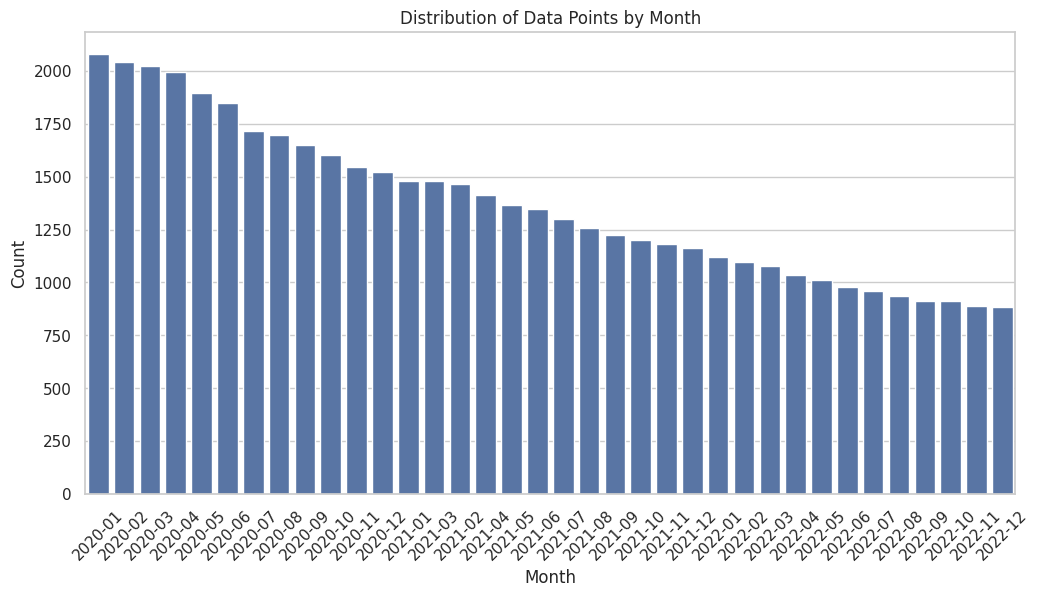

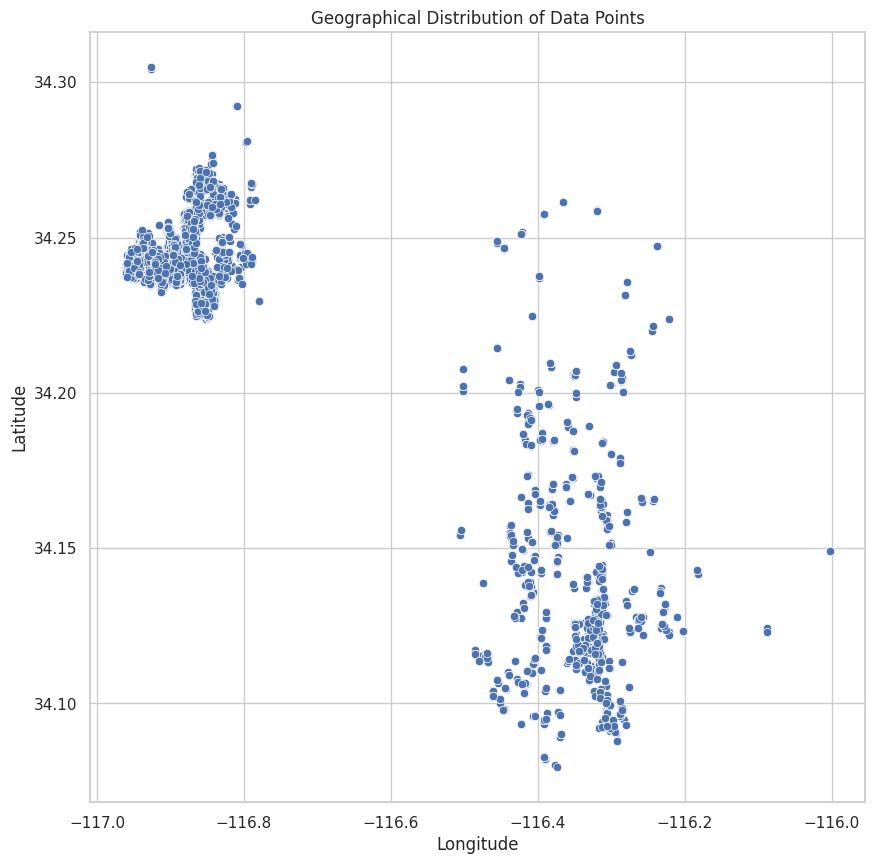

Most Common Street Names (excluding 'Street name is not specified'):
 street_name
Thrush Drive             413
Switzerland Drive        354
Starvation Flats Road    269
Villa Grove Avenue       227
Sheephorn Road           209
Name: count, dtype: int64

Least Common Street Names (excluding 'Street name is not specified'):
 street_name
Alta Avenue          4
Forest Hill Drive    3
Teakwood Drive       2
Crimson Circle       2
Glenwood Drive       1
Name: count, dtype: int64


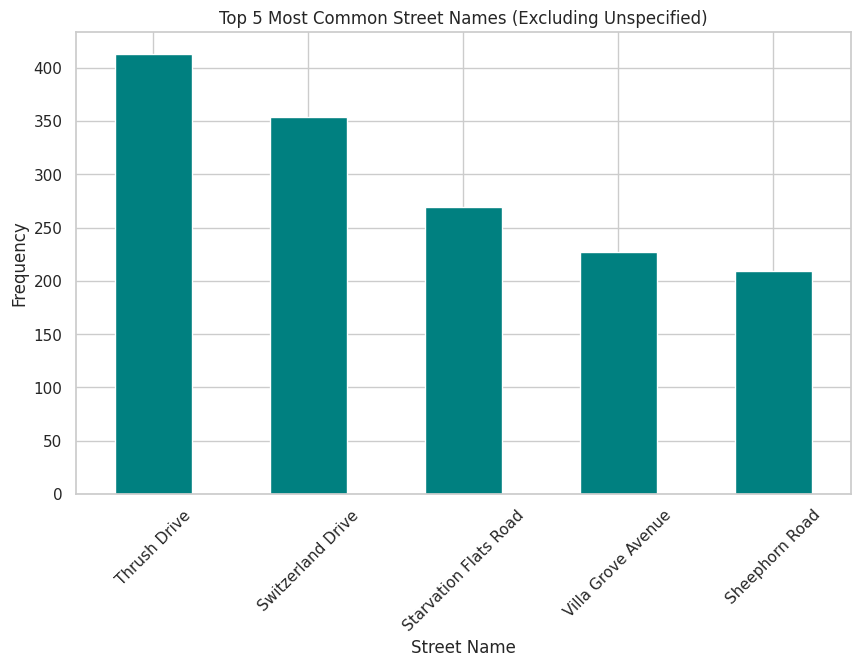

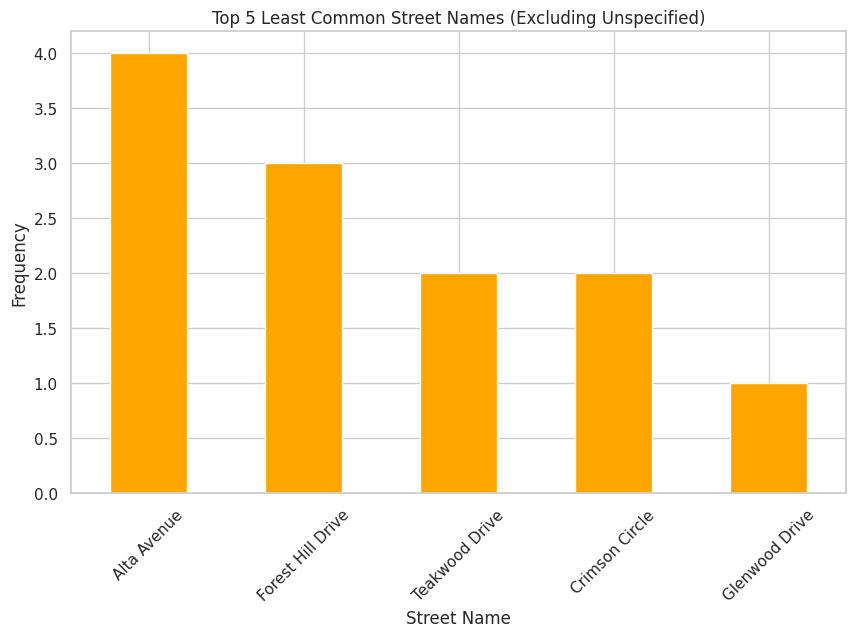

In [4]:
# Distribution of Data Points by Month
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=geolocation_data, order = geolocation_data['month'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Data Points by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 10))
sns.scatterplot(x='longitude', y='latitude', data=geolocation_data)
plt.title('Geographical Distribution of Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

# Excluding cases where street name is not specified
filtered_streets = geolocation_data[geolocation_data['street_name'] != "Street name is not specified"]

# Analyzing the frequency of different street names in the filtered data
filtered_street_name_counts = filtered_streets['street_name'].value_counts()

# Displaying the top 5 most common street names in the filtered data
most_common_streets_filtered = filtered_street_name_counts.head(5)
print("Most Common Street Names (excluding 'Street name is not specified'):\n", most_common_streets_filtered)

# Displaying the 5 least common street names in the filtered data
least_common_streets_filtered = filtered_street_name_counts.tail(5)
print("\nLeast Common Street Names (excluding 'Street name is not specified'):\n", least_common_streets_filtered)

# Plotting the top 5 most common street names (excluding 'Street name is not specified')
plt.figure(figsize=(10, 6))
most_common_streets_filtered.plot(kind='bar', color='teal')
plt.title('Top 5 Most Common Street Names (Excluding Unspecified)')
plt.xlabel('Street Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plotting the 5 least common street names (excluding 'Street name is not specified')
plt.figure(figsize=(10, 6))
least_common_streets_filtered.plot(kind='bar', color='orange')
plt.title('Top 5 Least Common Street Names (Excluding Unspecified)')
plt.xlabel('Street Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


**Airbnb Analysis - Big Bear Lake**

In [ ]:
from IPython.core.display import HTML

HTML("""
<div class='tableauPlaceholder' id='viz1706430200012' style='position: relative'>
    <noscript>
        <a href='#'>
            <img alt='Airbnb Analysis - Big Bear Lake ' src='https://public.tableau.com/static/images/KT/KTKDSB3N5/1_rss.png' style='border: none' />
        </a>
    </noscript>
    <object class='tableauViz' style='display:none;'>
        <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
        <param name='embed_code_version' value='3' />
        <param name='path' value='shared/KTKDSB3N5' />
        <param name='toolbar' value='yes' />
        <param name='static_image' value='https://public.tableau.com/static/images/KT/KTKDSB3N5/1.png' />
        <param name='animate_transition' value='yes' />
        <param name='display_static_image' value='yes' />
        <param name='display_spinner' value='yes' />
        <param name='display_overlay' value='yes' />
        <param name='display_count' value='yes' />
        <param name='language' value='en-US' />
        <param name='filter' value='publish=yes' />
    </object>
</div>
<script type='text/javascript'>
    var divElement = document.getElementById('viz1706430200012');
    var vizElement = divElement.getElementsByTagName('object')[0];
    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';
    var scriptElement = document.createElement('script');
    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
    vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>
""")

 ## 🛀 📊 EDA: Amenities  <a name="EDA: Amenities"></a>


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49311 entries, 0 to 49310
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unified_id  49311 non-null  object
 1   month       49311 non-null  object
 2   hot_tub     49311 non-null  int64 
 3   pool        49311 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


<ipython-input-5-9bc6dd73c940>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hot_tub_distribution.index, y=hot_tub_distribution.values, palette="Blues_d")
<ipython-input-5-9bc6dd73c940>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pool_distribution.index, y=pool_distribution.values, palette="Greens_d")


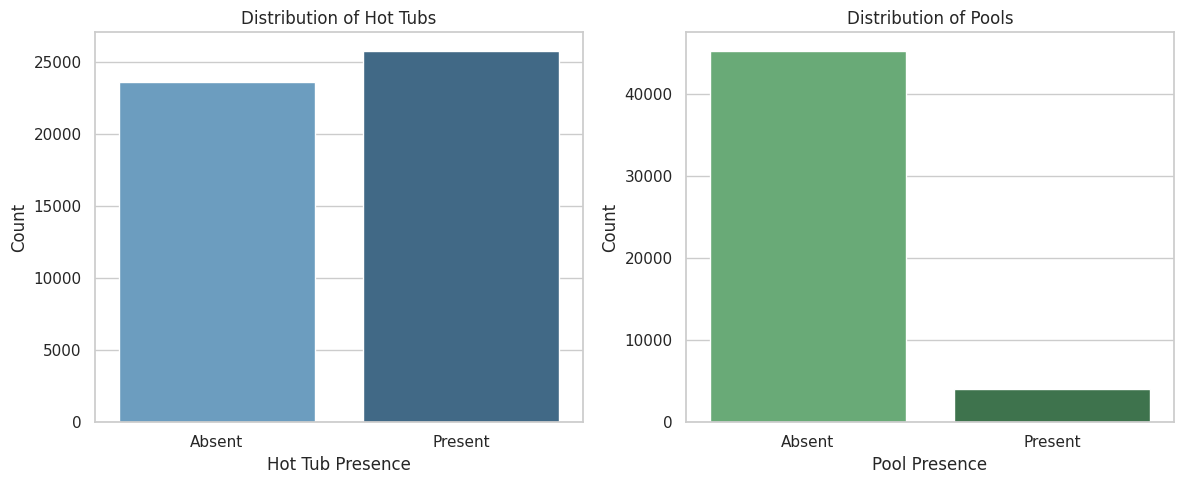

In [5]:
# Splitting the single column into multiple columns based on the semicolon delimiter
amenities_data = amenities_data['unified_id;month;hot_tub;pool'].str.split(';', expand=True)

# Renaming the columns
amenities_data.columns = ['unified_id', 'month', 'hot_tub', 'pool']

# Converting 'hot_tub' and 'pool' columns to integer type
amenities_data['hot_tub'] = amenities_data['hot_tub'].astype(int)
amenities_data['pool'] = amenities_data['pool'].astype(int)

# Checking the transformed dataset
amenities_data.info()
amenities_data.head()

# Analyzing the distribution of hot tubs and pools
hot_tub_distribution = amenities_data['hot_tub'].value_counts()
pool_distribution = amenities_data['pool'].value_counts()

# Visualization
plt.figure(figsize=(12, 5))

# Plot for hot tub distribution
plt.subplot(1, 2, 1)
sns.barplot(x=hot_tub_distribution.index, y=hot_tub_distribution.values, palette="Blues_d")
plt.title('Distribution of Hot Tubs')
plt.xlabel('Hot Tub Presence')
plt.ylabel('Count')
plt.xticks([0, 1], ['Absent', 'Present'])

# Plot for pool distribution
plt.subplot(1, 2, 2)
sns.barplot(x=pool_distribution.index, y=pool_distribution.values, palette="Greens_d")
plt.title('Distribution of Pools')
plt.xlabel('Pool Presence')
plt.ylabel('Count')
plt.xticks([0, 1], ['Absent', 'Present'])

plt.tight_layout()
plt.show()

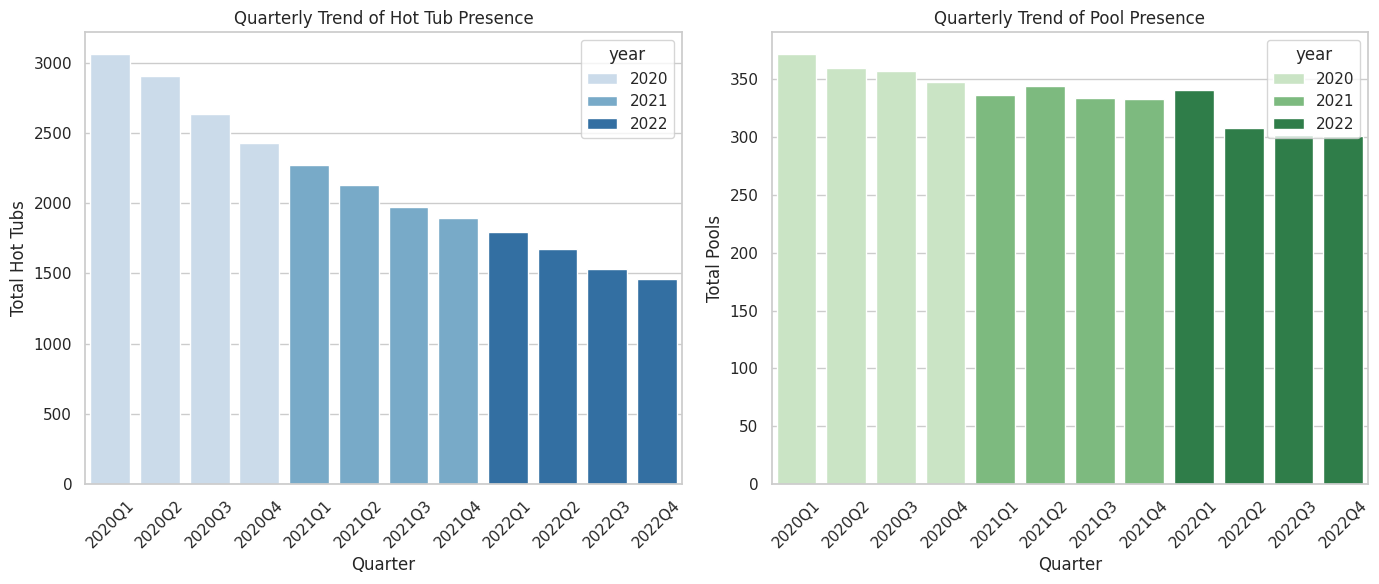

In [6]:
# Creating a new column for quarterly bins
# Assuming the 'month' format is 'YYYY-MM', we can extract the year and month to create quarters
amenities_data['year'] = amenities_data['month'].str[:4]
amenities_data['quarter'] = pd.to_datetime(amenities_data['month']).dt.to_period('Q')

# Grouping data by quarter and calculating the sum for hot tubs and pools
quarterly_amenities = amenities_data.groupby(['year', 'quarter'])[['hot_tub', 'pool']].sum().reset_index()
# Re-plotting with adjusted tick angles

plt.figure(figsize=(14, 6))

# Plot for hot tub trends by quarter
plt.subplot(1, 2, 1)
sns.barplot(x='quarter', y='hot_tub', hue='year', data=quarterly_amenities, palette='Blues')
plt.title('Quarterly Trend of Hot Tub Presence')
plt.xlabel('Quarter')
plt.ylabel('Total Hot Tubs')
plt.xticks(rotation=45)  # Rotating ticks

# Plot for pool trends by quarter
plt.subplot(1, 2, 2)
sns.barplot(x='quarter', y='pool', hue='year', data=quarterly_amenities, palette='Greens')
plt.title('Quarterly Trend of Pool Presence')
plt.xlabel('Quarter')
plt.ylabel('Total Pools')
plt.xticks(rotation=45)  # Rotating ticks

plt.tight_layout()
plt.show()

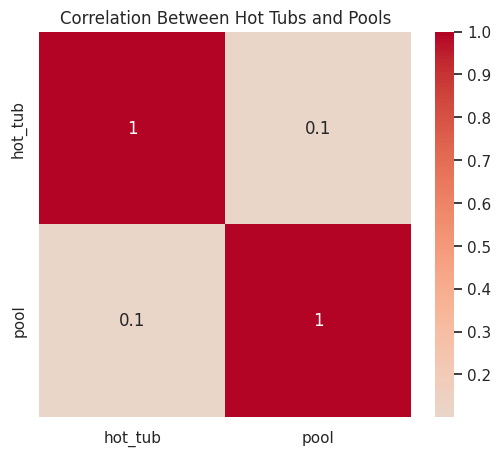

In [7]:
# Correlation analysis between hot tubs and pools
correlation = amenities_data[['hot_tub', 'pool']].corr()

# Visualization of the correlation
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Hot Tubs and Pools')
plt.show()

In [8]:
# Reading the file using semicolon as the delimiter and handling comma in numbers
market_analysis_data = pd.read_csv(market_analysis_path, delimiter=';', decimal=',')

# Initial assessment of the corrected market analysis dataset
market_analysis_data.info()
market_analysis_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116619 entries, 0 to 116618
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   unified_id    116619 non-null  int64  
 1   month         116619 non-null  object 
 2   zipcode       116619 non-null  int64  
 3   city          116619 non-null  object 
 4   host_type     116619 non-null  object 
 5   bedrooms      116619 non-null  int64  
 6   bathrooms     116619 non-null  object 
 7   guests        116619 non-null  object 
 8   revenue       116613 non-null  float64
 9   openness      116619 non-null  int64  
 10  occupancy     116619 non-null  float64
 11  nightly rate  93146 non-null   float64
 12  lead time     86025 non-null   float64
 13  length stay   86025 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 12.5+ MB


,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly rate,lead time,length stay
0,10000347,2020-1,92315,Big Bear Lake,2-5 Units,3,2,10,899.959992,31,0.064516,449.979996,52.0,3.0
1,10000347,2020-10,92315,Big Bear Lake,2-5 Units,3,2,10,13950.000000,31,1.000000,450.000000,NaN,NaN
2,10000347,2020-11,92315,Big Bear Lake,2-5 Units,3,2,10,13500.000000,30,1.000000,450.000000,NaN,NaN
3,10000347,2020-12,92315,Big Bear Lake,2-5 Units,3,2,10,13950.000000,31,1.000000,450.000000,NaN,NaN
4,10000347,2020-2,92315,Big Bear Lake,2-5 Units,3,2,10,450.000000,29,0.034483,450.000000,8.0,1.0


In [9]:
market_analysis_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unified_id,116619.0,4.391803e+16,1.609115e+17,58748.0,2.229672e+07,4.011635e+07,4.802902e+07,7.930037e+17
zipcode,116619.0,9.230500e+04,2.062426e+01,92252.0,9.231400e+04,9.231500e+04,9.231500e+04,9.231500e+04
bedrooms,116619.0,3.401538e+00,6.338029e-01,3.0,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
revenue,116613.0,5.745195e+03,7.264664e+03,0.0,7.960000e+02,3.811000e+03,8.000000e+03,1.519000e+05
openness,116619.0,2.833422e+01,6.164065e+00,1.0,3.000000e+01,3.000000e+01,3.100000e+01,3.100000e+01
occupancy,116619.0,4.383051e-01,3.459290e-01,0.0,1.000000e-01,4.193548e-01,7.419355e-01,1.000000e+00
nightly rate,93146.0,4.516178e+02,3.419852e+02,10.0,2.414622e+02,3.560000e+02,5.547375e+02,1.000000e+04
lead time,86025.0,3.426235e+01,3.956851e+01,1.0,1.085714e+01,2.291667e+01,4.300000e+01,3.640000e+02
length stay,86025.0,5.243706e+00,1.717016e+01,1.0,2.000000e+00,2.500000e+00,3.250000e+00,3.650000e+02


In [10]:
market_analysis_data.isnull().sum()

unified_id          0
month               0
zipcode             0
city                0
host_type           0
bedrooms            0
bathrooms           0
guests              0
revenue             6
openness            0
occupancy           0
nightly rate    23473
lead time       30594
length stay     30594
dtype: int64

In [11]:
market_analysis_data['revenue']=market_analysis_data['revenue'].fillna(market_analysis_data['revenue'].median())
market_analysis_data['nightly rate']=market_analysis_data['nightly rate'].fillna(market_analysis_data['nightly rate'].median())
market_analysis_data['lead time']=market_analysis_data['lead time'].fillna(market_analysis_data['lead time'].median())
market_analysis_data['length stay']=market_analysis_data['length stay'].fillna(market_analysis_data['length stay'].median())

In [12]:
market_analysis_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unified_id,116619.0,4.391803e+16,1.609115e+17,58748.0,2.229672e+07,4.011635e+07,4.802902e+07,7.930037e+17
zipcode,116619.0,9.230500e+04,2.062426e+01,92252.0,9.231400e+04,9.231500e+04,9.231500e+04,9.231500e+04
bedrooms,116619.0,3.401538e+00,6.338029e-01,3.0,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
revenue,116619.0,5.745096e+03,7.264490e+03,0.0,7.970000e+02,3.811000e+03,8.000000e+03,1.519000e+05
openness,116619.0,2.833422e+01,6.164065e+00,1.0,3.000000e+01,3.000000e+01,3.100000e+01,3.100000e+01
occupancy,116619.0,4.383051e-01,3.459290e-01,0.0,1.000000e-01,4.193548e-01,7.419355e-01,1.000000e+00
nightly rate,116619.0,4.323719e+02,3.080310e+02,10.0,2.682759e+02,3.560000e+02,4.908167e+02,1.000000e+04
lead time,116619.0,3.128591e+01,3.434873e+01,1.0,1.483333e+01,2.291667e+01,3.387500e+01,3.640000e+02
length stay,116619.0,4.523918e+00,1.479623e+01,1.0,2.166667e+00,2.500000e+00,3.000000e+00,3.650000e+02


 ## 💰 📊 EDA: Revenue & Occupancy  <a name="EDA: Revenue & Occupancy"></a>


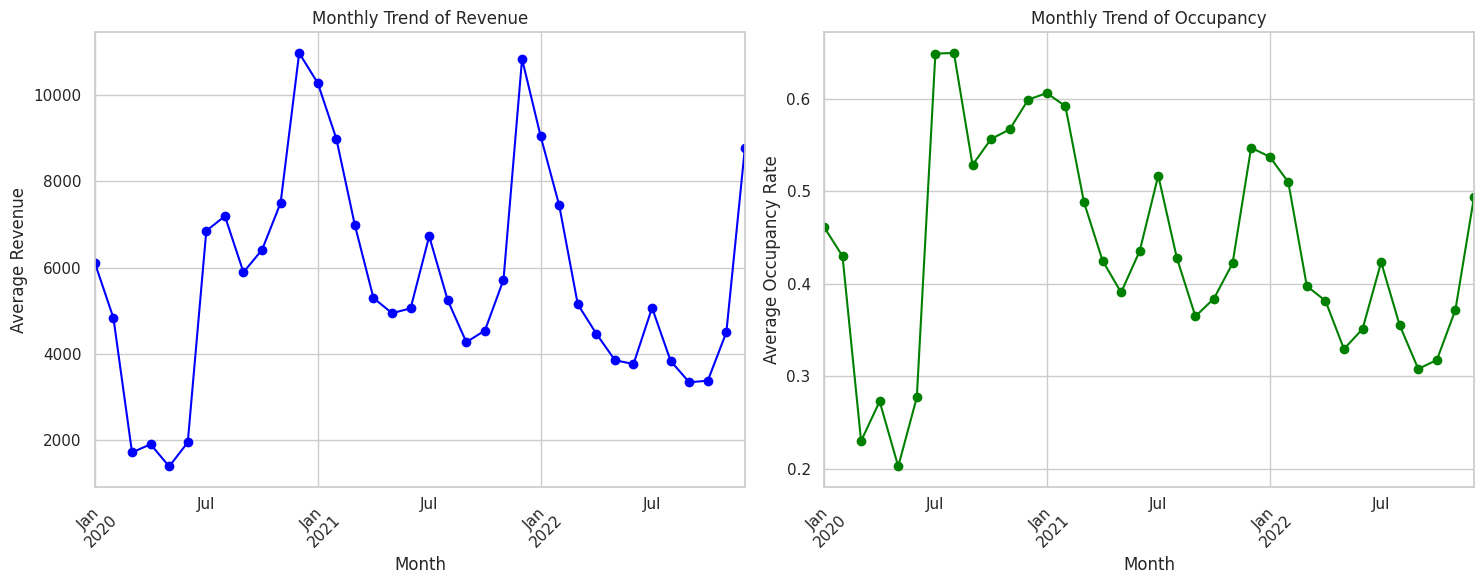

In [13]:
# Ensure 'month' column is in datetime format
market_analysis_data['month'] = pd.to_datetime(market_analysis_data['month'], format='%Y-%m')

# Extracting only the relevant numerical columns for monthly trend analysis
numerical_columns = ['revenue', 'occupancy', 'nightly rate', 'lead time', 'length stay']

# Grouping data by month and calculating the mean for the selected numerical columns
monthly_trends_numerical = market_analysis_data.groupby(market_analysis_data['month'].dt.to_period('M'))[numerical_columns].mean()

# Visualization
plt.figure(figsize=(15, 6))

# Plot for monthly trend of revenue
plt.subplot(1, 2, 1)
monthly_trends_numerical['revenue'].plot(kind='line', marker='o', color='blue')
plt.title('Monthly Trend of Revenue')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)

# Plot for monthly trend of occupancy
plt.subplot(1, 2, 2)
monthly_trends_numerical['occupancy'].plot(kind='line', marker='o', color='green')
plt.title('Monthly Trend of Occupancy')
plt.xlabel('Month')
plt.ylabel('Average Occupancy Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

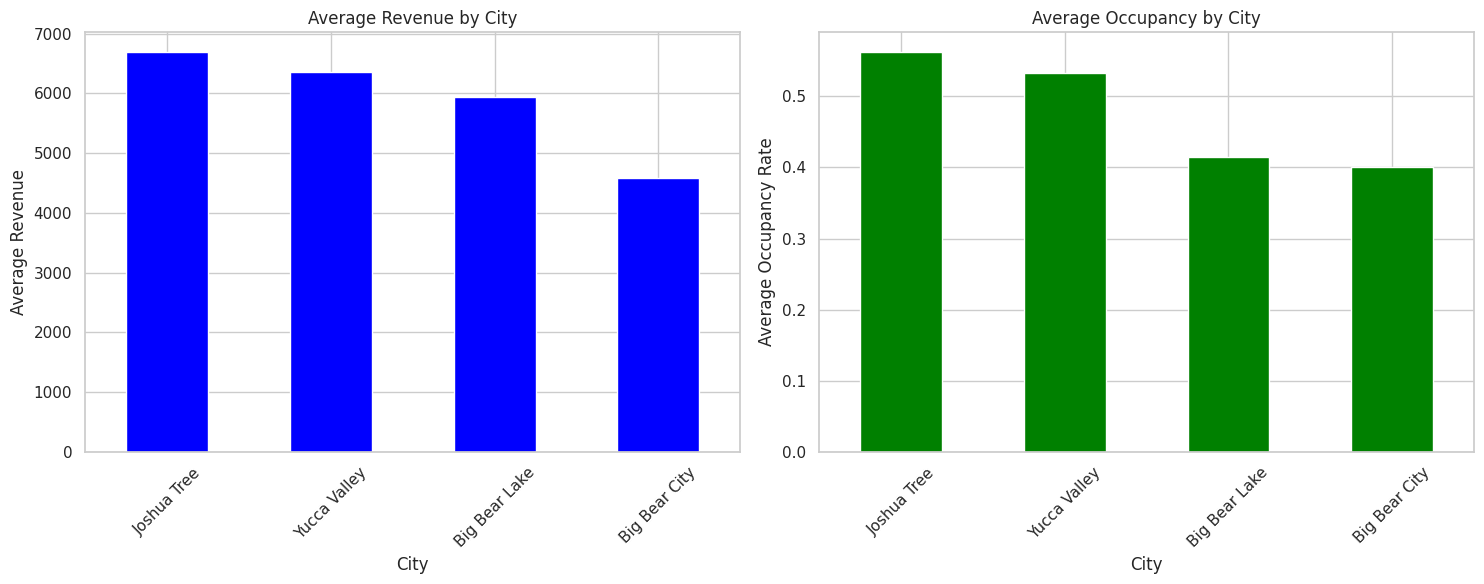

In [14]:
# Grouping data by city and calculating the mean for revenue and occupancy
city_trends = market_analysis_data.groupby('city')[['revenue', 'occupancy']].mean().sort_values(by='revenue', ascending=False)

# Visualization
plt.figure(figsize=(15, 6))

# Plot for average revenue by city
plt.subplot(1, 2, 1)
city_trends['revenue'].plot(kind='bar', color='blue')
plt.title('Average Revenue by City')
plt.xlabel('City')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)

# Plot for average occupancy by city
plt.subplot(1, 2, 2)
city_trends['occupancy'].plot(kind='bar', color='green')
plt.title('Average Occupancy by City')
plt.xlabel('City')
plt.ylabel('Average Occupancy Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

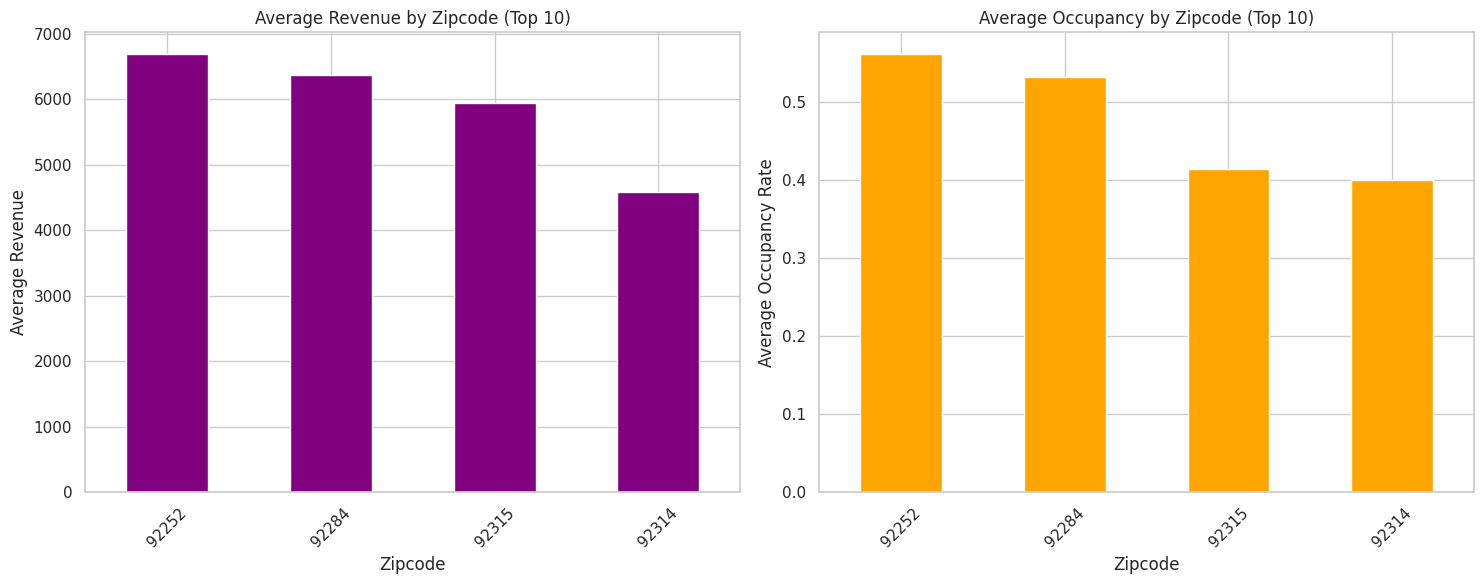

In [15]:
# Grouping data by zipcode and calculating the mean for revenue and occupancy
zipcode_trends = market_analysis_data.groupby('zipcode')[['revenue', 'occupancy']].mean().sort_values(by='revenue', ascending=False)

# Selecting top zip codes for visualization (for clarity in the plot)
top_zipcodes = zipcode_trends.head(10)

# Visualization
plt.figure(figsize=(15, 6))

# Plot for average revenue by zipcode
plt.subplot(1, 2, 1)
top_zipcodes['revenue'].plot(kind='bar', color='purple')
plt.title('Average Revenue by Zipcode (Top 10)')
plt.xlabel('Zipcode')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)

# Plot for average occupancy by zipcode
plt.subplot(1, 2, 2)
top_zipcodes['occupancy'].plot(kind='bar', color='orange')
plt.title('Average Occupancy by Zipcode (Top 10)')
plt.xlabel('Zipcode')
plt.ylabel('Average Occupancy Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

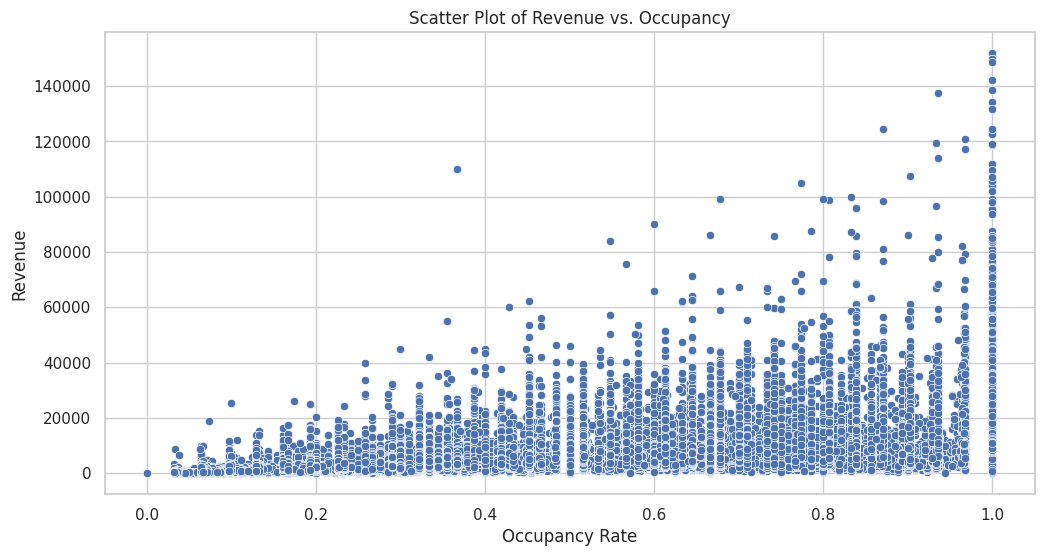

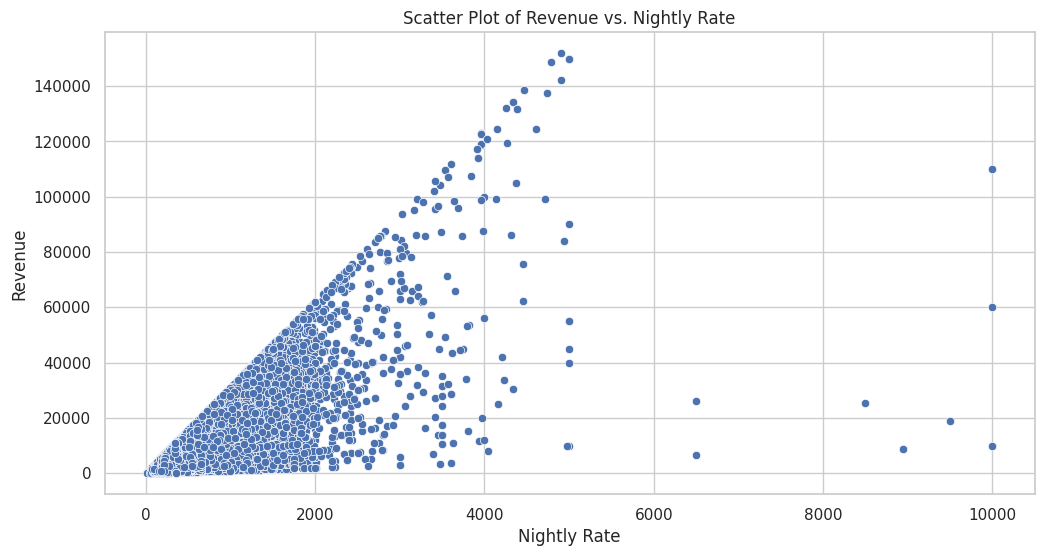

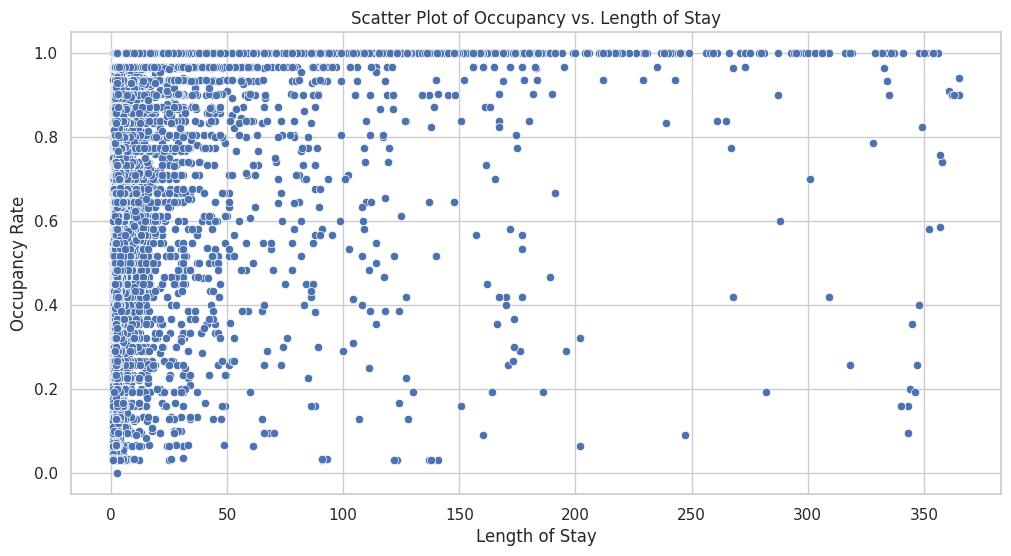

In [16]:
import seaborn as sns

# Scatter plot for Revenue vs. Occupancy
plt.figure(figsize=(12, 6))
sns.scatterplot(x='occupancy', y='revenue', data=market_analysis_data)
plt.title('Scatter Plot of Revenue vs. Occupancy')
plt.xlabel('Occupancy Rate')
plt.ylabel('Revenue')
plt.show()

# Scatter plot for Revenue vs. Nightly Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(x='nightly rate', y='revenue', data=market_analysis_data)
plt.title('Scatter Plot of Revenue vs. Nightly Rate')
plt.xlabel('Nightly Rate')
plt.ylabel('Revenue')
plt.show()

# Scatter plot for Occupancy vs. Length of Stay
plt.figure(figsize=(12, 6))
sns.scatterplot(x='length stay', y='occupancy', data=market_analysis_data)
plt.title('Scatter Plot of Occupancy vs. Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Occupancy Rate')
plt.show()


**we can try to see if we can build a model that will predict the occupancy rate**

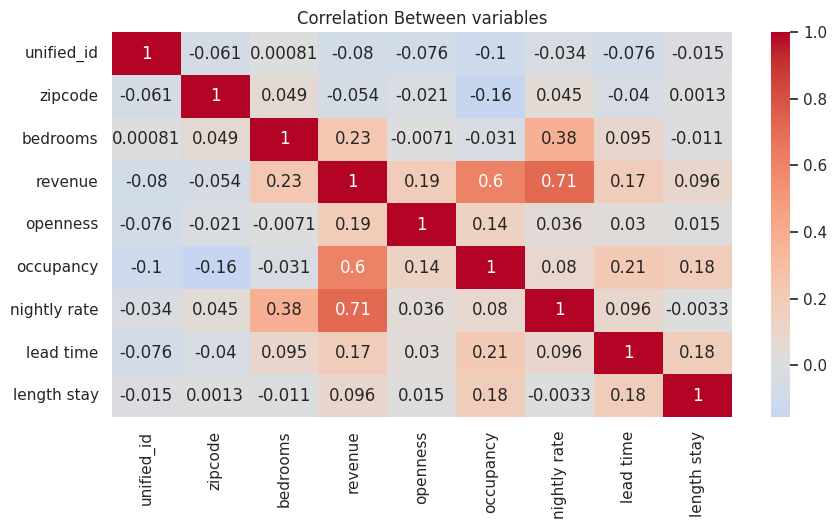

In [17]:
plt.figure(figsize=(10, 5))
numeric_df = market_analysis_data.select_dtypes(include=['int64', 'float64'])
corr= numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between variables')
plt.show()

We can see that occupancy has a high positive correlation rate with revenue and somehow postive correct correlation with openess, lead time and length stay. also has a negative coralation with zip code

In [18]:
#one hot-encoding
market_analysis_data = pd.get_dummies(market_analysis_data)

In [19]:
market_analysis_data.head()

,unified_id,month,zipcode,bedrooms,revenue,openness,occupancy,nightly rate,lead time,length stay,...,guests_14,guests_15+,guests_2,guests_3,guests_4,guests_5,guests_6,guests_7,guests_8,guests_9
0,10000347,2020-01-01,92315,3,899.959992,31,0.064516,449.979996,52.000000,3.0,...,False,False,False,False,False,False,False,False,False,False
1,10000347,2020-10-01,92315,3,13950.000000,31,1.000000,450.000000,22.916667,2.5,...,False,False,False,False,False,False,False,False,False,False
2,10000347,2020-11-01,92315,3,13500.000000,30,1.000000,450.000000,22.916667,2.5,...,False,False,False,False,False,False,False,False,False,False
3,10000347,2020-12-01,92315,3,13950.000000,31,1.000000,450.000000,22.916667,2.5,...,False,False,False,False,False,False,False,False,False,False
4,10000347,2020-02-01,92315,3,450.000000,29,0.034483,450.000000,8.000000,1.0,...,False,False,False,False,False,False,False,False,False,False


In [20]:
market_analysis_data.drop(['unified_id'], axis=1, inplace=True)

In [21]:
market_analysis_data.head()

,month,zipcode,bedrooms,revenue,openness,occupancy,nightly rate,lead time,length stay,city_Big Bear City,...,guests_14,guests_15+,guests_2,guests_3,guests_4,guests_5,guests_6,guests_7,guests_8,guests_9
0,2020-01-01,92315,3,899.959992,31,0.064516,449.979996,52.000000,3.0,False,...,False,False,False,False,False,False,False,False,False,False
1,2020-10-01,92315,3,13950.000000,31,1.000000,450.000000,22.916667,2.5,False,...,False,False,False,False,False,False,False,False,False,False
2,2020-11-01,92315,3,13500.000000,30,1.000000,450.000000,22.916667,2.5,False,...,False,False,False,False,False,False,False,False,False,False
3,2020-12-01,92315,3,13950.000000,31,1.000000,450.000000,22.916667,2.5,False,...,False,False,False,False,False,False,False,False,False,False
4,2020-02-01,92315,3,450.000000,29,0.034483,450.000000,8.000000,1.0,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:

market_analysis_data['month'] = pd.to_datetime(market_analysis_data['month'])
market_analysis_data['month'] = market_analysis_data['month'].dt.month

market_analysis_data.head()

,month,zipcode,bedrooms,revenue,openness,occupancy,nightly rate,lead time,length stay,city_Big Bear City,...,guests_14,guests_15+,guests_2,guests_3,guests_4,guests_5,guests_6,guests_7,guests_8,guests_9
0,1,92315,3,899.959992,31,0.064516,449.979996,52.000000,3.0,False,...,False,False,False,False,False,False,False,False,False,False
1,10,92315,3,13950.000000,31,1.000000,450.000000,22.916667,2.5,False,...,False,False,False,False,False,False,False,False,False,False
2,11,92315,3,13500.000000,30,1.000000,450.000000,22.916667,2.5,False,...,False,False,False,False,False,False,False,False,False,False
3,12,92315,3,13950.000000,31,1.000000,450.000000,22.916667,2.5,False,...,False,False,False,False,False,False,False,False,False,False
4,2,92315,3,450.000000,29,0.034483,450.000000,8.000000,1.0,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
market_analysis_data['month'] = pd.to_datetime(market_analysis_data['month']).dt.month

# Model Building and Evaluation

In [24]:
market_analysis_data.dtypes.value_counts()

bool       35
float64     5
int64       3
int32       1
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    market_analysis_data.drop('occupancy', axis=1), market_analysis_data[['occupancy']],
    test_size=0.20, random_state=3)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# We need to fit the scaler to our data before transformation
market_analysis_data.loc[:, market_analysis_data.columns != 'occupancy'] = scaler.fit_transform(market_analysis_data.loc[:, market_analysis_data.columns != 'occupancy'])

In [27]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
parameter_space = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

clf = RandomizedSearchCV(XGBRegressor(random_state=3),
                         parameter_space, cv=5, n_jobs=4,
                         scoring="neg_mean_absolute_error",
                         random_state=3, n_iter=10)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'subsample': 0.6, 'reg_lambda': 10, 'reg_alpha': 10, 'n_estimators': 2500, 'max_depth': 4, 'learning_rate': 0.009, 'gamma': 7, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5, 'booster': 'gbtree'}


In [28]:
model = XGBRegressor(**clf.best_params_)

In [29]:
xgb_model= model.fit(X_train, y_train)

In [30]:
y_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, y_pred)
print("XGBoost MAE =", xgb_mae)

XGBoost MAE = 0.05879189381093206


In [31]:
import numpy as np
y_train.describe(include=[np.number])

,occupancy
count,93295.000000
mean,0.438138
std,0.345733
min,0.000000
25%,0.100000
50%,0.419355
75%,0.741935
max,1.000000


We can see that the mean is aprox. 0.44 and the median is 0.42. We can see also that the first quartile is 0.1; this means that 75% of the data is larger than this number.Now looking at XGBoost error of approx. 0.06, we can say that an error of about  0.06 is good for us for data whose mean is 0.44 and whose 75% of it is larger than 0.1.

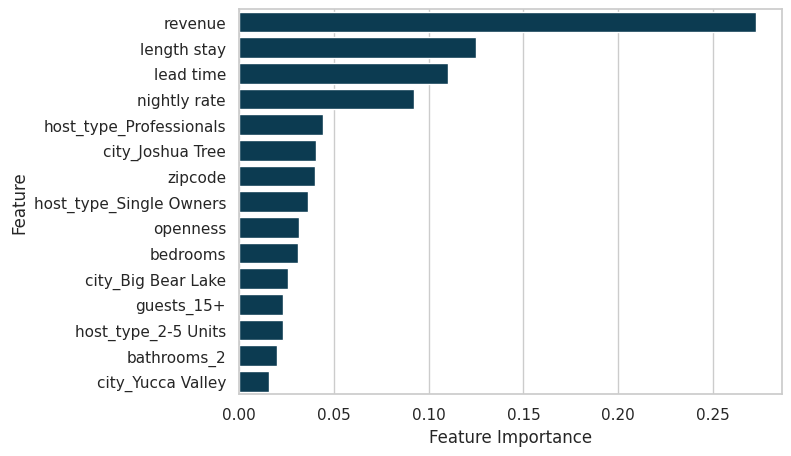

In [32]:
xgb_feature_importances = model.feature_importances_
xgb_feature_importances = pd.Series(
    xgb_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=xgb_feature_importances,
            y=xgb_feature_importances.index,
            color="#003f5c");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

we can see the main feature to predict our occupancy rate is respectively the revenue, length of stay,lead time and nightly rate.

In [33]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model):
    train_sizes,train_scores,test_scores=learning_curve(
        X=X_train,
        y=y_train,
        estimator=model,
        train_sizes=np.linspace(0.1,1,10),
        cv=3,
        scoring='neg_root_mean_squared_error',
        #verbose=1
    )

    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='red')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='red')
    plt.xlabel('Training Set Size')
    plt.ylabel('MAE')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

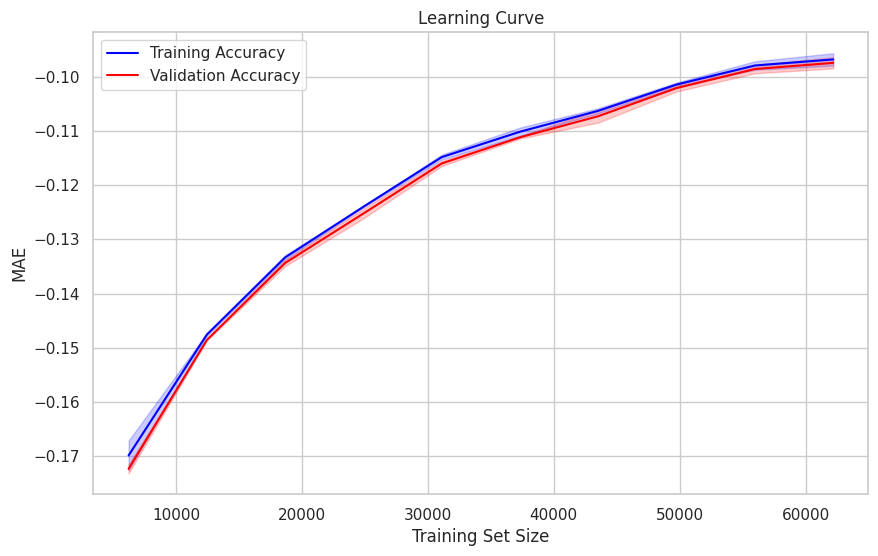

In [34]:
plot_learning_curve(model)

In [35]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [36]:
from sklearn import metrics
r2_train=metrics.r2_score(train_prediction,y_train)
r2_test=metrics.r2_score(test_prediction,y_test)
mae_train=metrics.mean_absolute_error(train_prediction,y_train)
mae_test=metrics.mean_absolute_error(test_prediction,y_test)
rmse_train=metrics.mean_squared_error(train_prediction,y_train,squared=False)
rmse_test=metrics.mean_squared_error(test_prediction,y_test,squared=False)
train_scores={'R2_train':r2_train,'MAE_train':mae_train,'RMSE_train':rmse_train}
test_scores={'R2_test':r2_test,'MAE_test':mae_test,'RMSE_test':rmse_test}
print(train_scores)
print(test_scores)

{'R2_train': 0.9210903392665575, 'MAE_train': 0.05793730496325794, 'RMSE_train': 0.08625443823349324}
{'R2_test': 0.9189681874930117, 'MAE_test': 0.05879189381093206, 'RMSE_test': 0.08745932450442949}


In [37]:
df_actual_value=pd.DataFrame(y_test)
df_actual_value['prediction']=y_pred
df_actual_value.head(15)

,occupancy,prediction
67711,0.516129,0.564228
91153,0.354839,0.369923
43911,0.678571,0.664204
82534,0.357143,0.391661
34932,0.400000,0.443677
59812,0.741935,0.785612
85173,0.709677,0.727652
92576,0.500000,0.457404
102767,0.600000,0.586440
11405,0.000000,-0.001594


Epoch 1/20
2333/2333 [==============================] - 11s 4ms/step - loss: 107.5882 - val_loss: 45.7152
Epoch 2/20
2333/2333 [==============================] - 8s 3ms/step - loss: 42.2830 - val_loss: 71.4401
Epoch 3/20
2333/2333 [==============================] - 9s 4ms/step - loss: 42.7523 - val_loss: 45.7710
Epoch 4/20
2333/2333 [==============================] - 7s 3ms/step - loss: 34.8259 - val_loss: 14.4522
Epoch 5/20
2333/2333 [==============================] - 9s 4ms/step - loss: 25.8724 - val_loss: 5.7963
Epoch 6/20
2333/2333 [==============================] - 8s 4ms/step - loss: 22.1592 - val_loss: 27.9000
Epoch 7/20
2333/2333 [==============================] - 8s 4ms/step - loss: 16.9583 - val_loss: 23.7698
Epoch 8/20
2333/2333 [==============================] - 9s 4ms/step - loss: 12.4384 - val_loss: 2.7815
Epoch 9/20
2333/2333 [==============================] - 7s 3ms/step - loss: 9.6953 - val_loss: 2.6152
Epoch 10/20
2333/2333 [==============================] - 9s 4ms/st

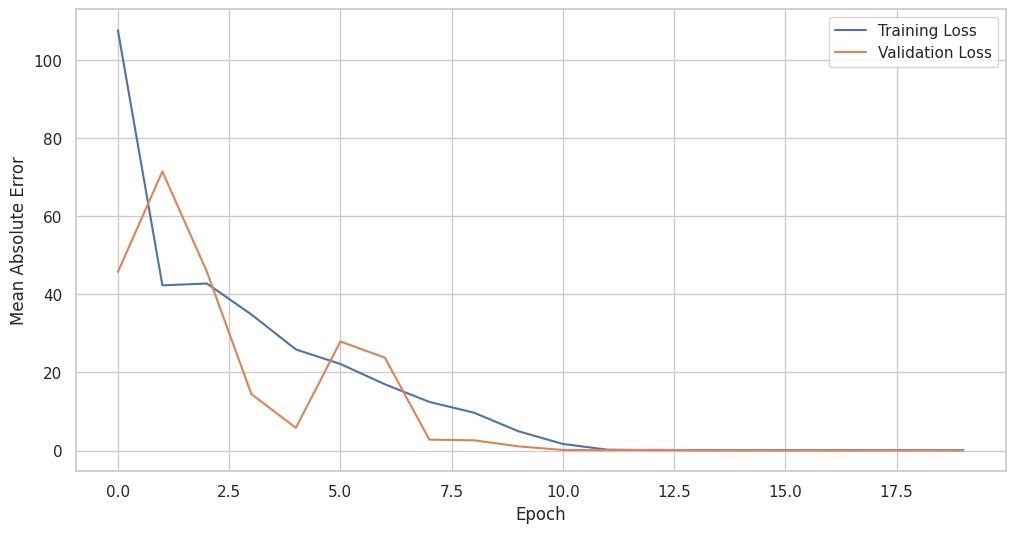

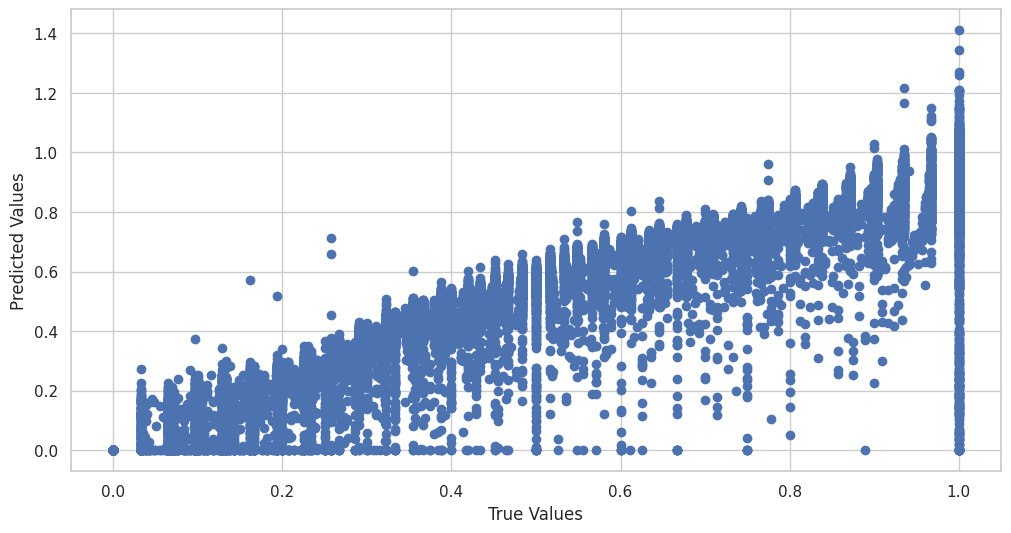

Mean Absolute Error: 0.0719417974367908


In [40]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(loss='mean_absolute_error', optimizer='adam')
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

mae = mean_absolute_error(y_test, test_predictions)
print('Mean Absolute Error:', mae)


In [41]:
test_loss = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)

729/729 [==============================] - 1s 2ms/step


In [42]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE:', mae)

MAE: 0.0719417974367908


In [45]:
train_prediction=model.predict(X_train)


2916/2916 [==============================] - 6s 2ms/step


In [46]:
from sklearn import metrics
r2_train=metrics.r2_score(train_prediction,y_train)
r2_test=metrics.r2_score(test_predictions,y_test)
mae_train=metrics.mean_absolute_error(train_prediction,y_train)
mae_test=metrics.mean_absolute_error(test_predictions,y_test)
rmse_train=metrics.mean_squared_error(train_prediction,y_train,squared=False)
rmse_test=metrics.mean_squared_error(test_predictions,y_test,squared=False)
train_scores={'R2_train':r2_train,'MAE_train':mae_train,'RMSE_train':rmse_train}
test_scores={'R2_test':r2_test,'MAE_test':mae_test,'RMSE_test':rmse_test}
print(train_scores)
print(test_scores)

{'R2_train': 0.8704118719500953, 'MAE_train': 0.071208835, 'RMSE_train': 0.11889651}
{'R2_test': 0.8682234943570857, 'MAE_test': 0.0719417974367908, 'RMSE_test': 0.1199602353788451}
